In [1]:
import pandas as pds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import plot_model

In [2]:
data = pds.read_csv("data.csv")
data.shape

(10, 2)

In [3]:
labels = data.Sentimen.factorize()
labels

(array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1]),
 Index(['Positif', 'Negatif'], dtype='object'))

In [4]:
comment = data.Komentar.values
tzer = Tokenizer()
tzer.fit_on_texts(comment)
size = len(tzer.word_index) + 1
pad_seq = pad_sequences(tzer.texts_to_sequences(comment), 10)

print(tzer.word_index)

{'kamu': 1, 'sangat': 2, 'aku': 3, 'jelek': 4, 'baju': 5, 'bagus': 6, 'suka': 7, 'benci': 8, 'makan': 9, 'sate': 10, 'kambing': 11, 'orang': 12, 'nakal': 13, 'dirimu': 14, 'motor': 15, 'muka': 16, 'makanannya': 17, 'enak': 18, 'buah': 19, 'apel': 20, 'sinetron': 21, 'di': 22, 'tv': 23}


In [5]:
model = Sequential()

model.add(Embedding(size, 64, input_length=len(pad_seq)))
model.add(LSTM(20))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            1536      
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 20)                6800      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 8,557
Trainable params: 8,557
Non-trainable params: 0
_________________________________________________________________


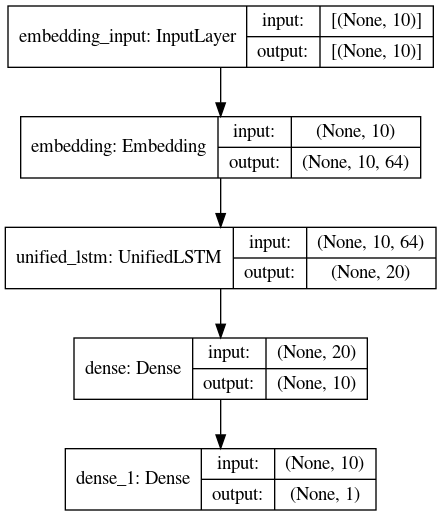

In [6]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [7]:
model.fit(pad_seq, labels[0], epochs=50, verbose=0)
scores = model.evaluate(pad_seq, labels[0])

print("Loss: ", scores[0])
print("Test: ", scores[1])

10/10 [==============================] - 0s 21ms/sample - loss: 0.3609 - accuracy: 1.0000
Loss:  0.36090055108070374
Test:  1.0


In [8]:
sample = "Buah apel sangat enak"
test = tzer.texts_to_sequences([sample])
test = pad_sequences(test, 10)

predict = int(model.predict(test).round().item())

print("Hasil sentimen adalah: ", labels[1][predict])

Hasil sentimen adalah:  Positif
